# Modelo predictivo amargo de un cocimiento de Estándar

In [ ]:
import pandas as pd

df = pd.read_csv('../src/2024_2025estesi.csv', sep=';', encoding='latin1')

df

,Coc,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha cidos Herkules,Catalizador isomerizaci¢n,Amargo por cocimiento
0,1,CLUB COLOMBIA,1000,9,28,13.4,NaN,47.7
1,2,CLUB COLOMBIA,1000,9,28,13.4,NaN,44.9
2,3,CLUB COLOMBIA,989,9,27,13.4,NaN,44.6
3,4,CLUB COLOMBIA,995,9,28,13.4,NaN,45.3
4,5,ESTANDAR 900,942,0,0,13.4,0.0,0
...,...,...,...,...,...,...,...,...
3051,2583,ESTANDAR 18,989,3,43,13.4,1800.0,NaN
3052,2584,ESTANDAR 18,987,3,43,13.4,1800.0,NaN
3053,2585,ESTANDAR 18,989,0,0,13.4,0.0,NaN
3054,2586,ESTANDAR 18,986,4,66,13.4,2700.0,NaN


In [1]:
#Para revisar en qué columnas yo tengo un valor nulo
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        print(column)

print('tengo nulos en todas estas columnas')

NameError: name 'df' is not defined

In [ ]:
df.shape

(3056, 8)

In [ ]:
#Ahora a las columna de catalizador isomerización le voy a rellenar los valores nulos con el valor 0
df['Catalizador isomerizaci¢n'] = df['Catalizador isomerizaci¢n'].fillna(0)

In [ ]:
#Ahora a borrar filas con nulos:
df = df.dropna()
df
#no borro aquí nada porque me baja más de 500 filas D:

,Coc,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha cidos Herkules,Catalizador isomerizaci¢n,Amargo por cocimiento
0,1,CLUB COLOMBIA,1000,9,28,13.4,0.0,47.7
1,2,CLUB COLOMBIA,1000,9,28,13.4,0.0,44.9
2,3,CLUB COLOMBIA,989,9,27,13.4,0.0,44.6
3,4,CLUB COLOMBIA,995,9,28,13.4,0.0,45.3
4,5,ESTANDAR 900,942,0,0,13.4,0.0,0
...,...,...,...,...,...,...,...,...
3029,2561,ESTANDAR 18,977,3,43,13.4,1800.0,46.74
3045,2577,CLUB COLOMBIA,990,9,28,13.4,0.0,43.3
3046,2578,CLUB COLOMBIA,990,9,28,13.4,0.0,43.4
3047,2579,CLUB COLOMBIA,990,9,28,13.4,0.0,45.5


In [ ]:
df = df.drop(columns=['Coc'])

In [ ]:
df.info()
#no hay nulos
#Ahora para renombrar una columna
df = df.rename(columns={'Alpha \xa0cidos Herkules': 'Alpha acidos herkules'})
df = df.rename(columns={'Alpha \xa0cidos Herkules': 'Alpha acidos herkules'})

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         894 non-null    object 
 1   Volumen Total de filtraci¢n   894 non-null    object 
 2   Extracto CO2                  894 non-null    object 
 3   L£pulo Pellet  Herkules       894 non-null    object 
 4   Alpha  cidos Herkules         894 non-null    object 
 5   Catalizador isomerizaci¢n     894 non-null    float64
 6   Amargo por cocimiento         894 non-null    object 
dtypes: float64(1), object(6)
memory usage: 55.9+ KB


In [ ]:
#Ahora debo volver todas las columnas numericas
df['Catalizador isomerizaci¢n'] = pd.to_numeric(df['Catalizador isomerizaci¢n'], errors='coerce')
df['Extracto CO2'] = pd.to_numeric(df['Extracto CO2'], errors='coerce')
df['L£pulo Pellet  Herkules'] = pd.to_numeric(df['L£pulo Pellet  Herkules'], errors='coerce')
df['Alpha acidos herkules'] = pd.to_numeric(df['Alpha acidos herkules'], errors='coerce')
df['Amargo por cocimiento'] = pd.to_numeric(df['Amargo por cocimiento'], errors='coerce')
df['Volumen Total de filtraci¢n '] = pd.to_numeric(df['Volumen Total de filtraci¢n '], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         894 non-null    object 
 1   Volumen Total de filtraci¢n   893 non-null    float64
 2   Extracto CO2                  893 non-null    float64
 3   L£pulo Pellet  Herkules       892 non-null    float64
 4   Alpha acidos herkules         893 non-null    float64
 5   Catalizador isomerizaci¢n     894 non-null    float64
 6   Amargo por cocimiento         890 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.9+ KB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         885 non-null    object 
 1   Volumen Total de filtraci¢n   885 non-null    float64
 2   Extracto CO2                  885 non-null    float64
 3   L£pulo Pellet  Herkules       885 non-null    float64
 4   Alpha acidos herkules         885 non-null    float64
 5   Catalizador isomerizaci¢n     885 non-null    float64
 6   Amargo por cocimiento         885 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


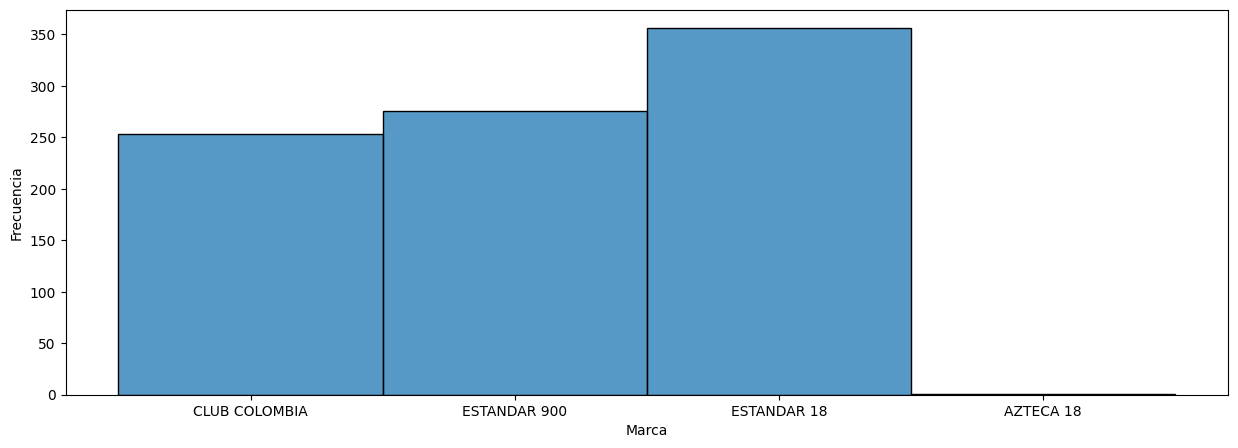

In [ ]:
#Análisis univariante
#variable categórica
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, figsize=(15, 5))

sns.histplot(df['Marca'], ax=axis).set(ylabel='Frecuencia')
plt.show()

In [ ]:
#Ahora debo borrar las filas de club colombia en mi columna marca
df = df[df['Marca'] != 'CLUB COLOMBIA']
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


In [ ]:
#Variables numéricas
from utils import columnas_numericas
columnas_numericas(df)
print(columnas_numericas(df))


['Volumen Total de filtraci¢n ', 'Extracto CO2', 'L£pulo Pellet  Herkules', 'Alpha acidos herkules', 'Catalizador isomerizaci¢n', 'Amargo por cocimiento']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


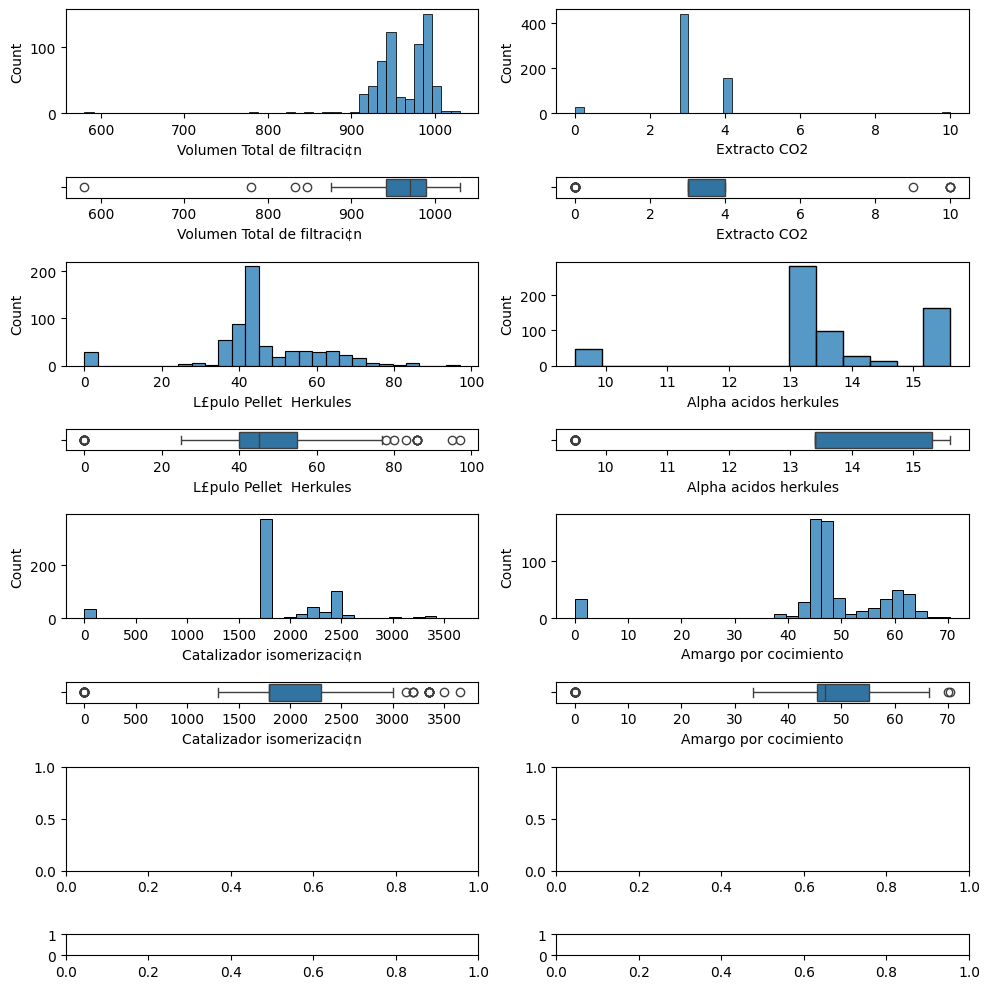

In [ ]:
#Análisis univariante
#Variables numéricas
from utils import analisis_numerico_numerico
analisis_numerico_numerico(df,'Amargo por cocimiento')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


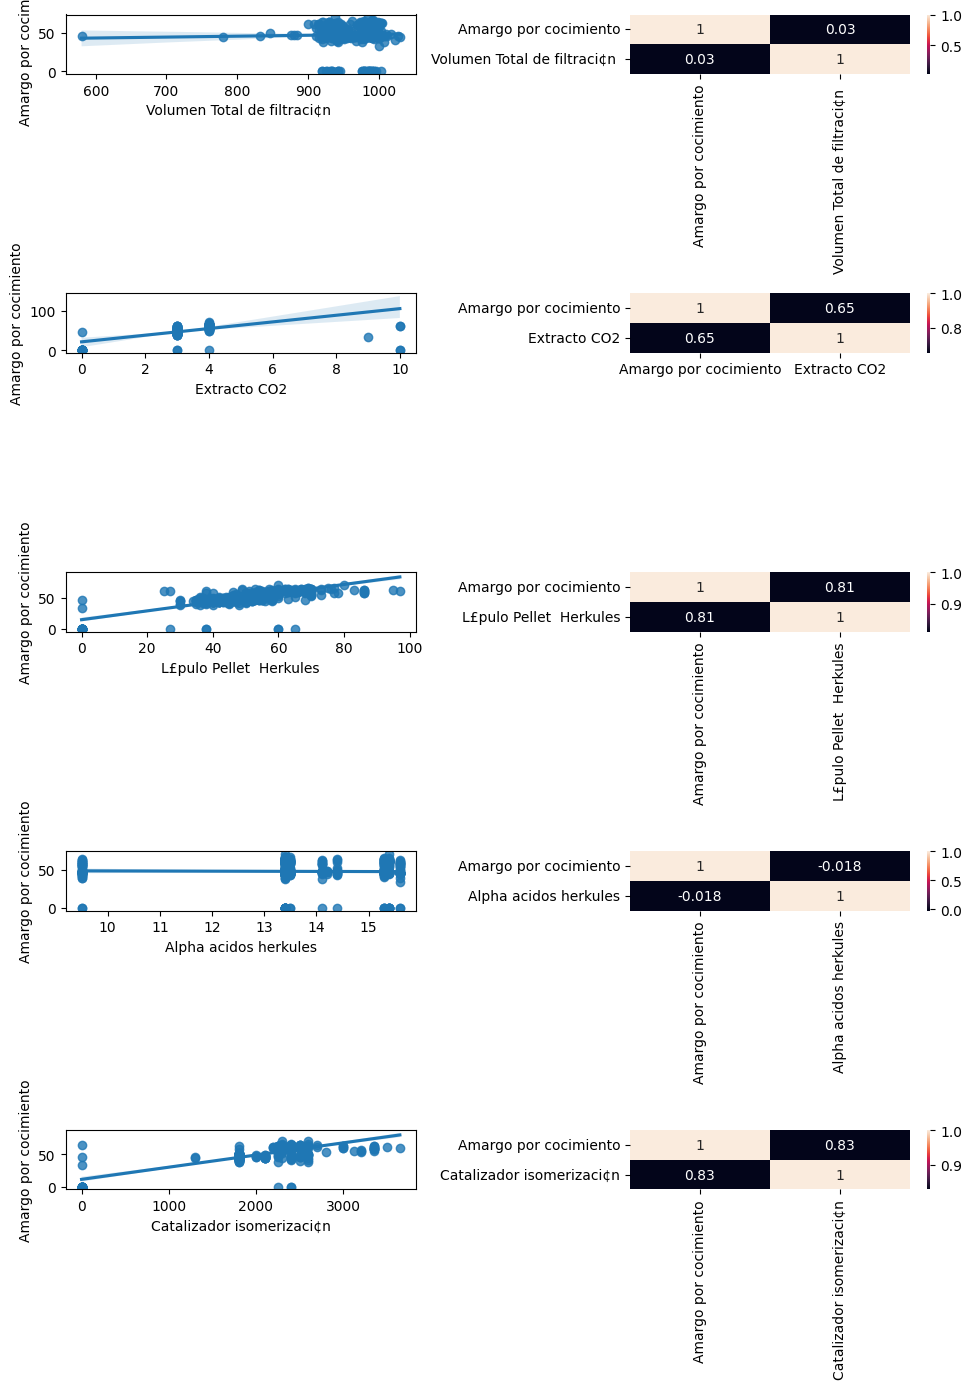

In [ ]:
#Se continua con el análisis multivariable
fig, axis = plt.subplots(5, 2, figsize=(10, 14))

sns.regplot(ax=axis[0, 0], data=df, x='Volumen Total de filtraci¢n ', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Volumen Total de filtraci¢n ']].corr(), ax=axis[0, 1], annot=True)
sns.regplot(ax=axis[1, 0], data=df, x='Extracto CO2', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Extracto CO2']].corr(), ax=axis[1, 1], annot=True)
sns.regplot(ax=axis[2, 0], data=df, x='L£pulo Pellet  Herkules', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'L£pulo Pellet  Herkules']].corr(), ax=axis[2, 1], annot=True)
sns.regplot(ax=axis[3, 0], data=df, x='Alpha acidos herkules', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Alpha acidos herkules']].corr(), ax=axis[3, 1], annot=True)
sns.regplot(ax=axis[4, 0], data=df, x='Catalizador isomerizaci¢n', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Catalizador isomerizaci¢n']].corr(), ax=axis[4, 1], annot=True)

plt.tight_layout()
plt.show()

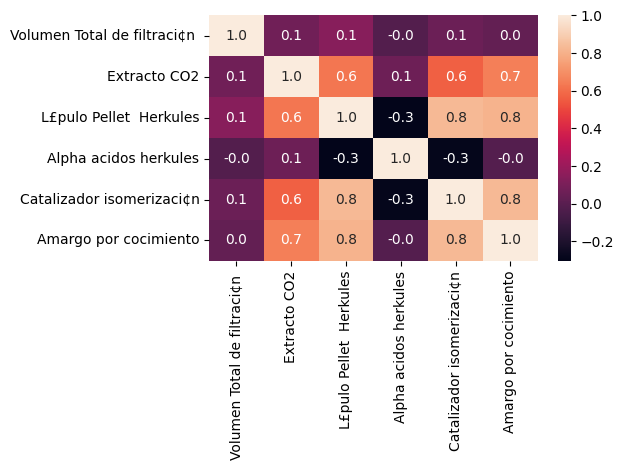

In [ ]:
#Ahora análisis numérico categórico.
#Factorizo la variable categórica.
# no factorizo la categórica porque el random forest no necesita todo numérico 
df['Marca'] = pd.factorize(df['Marca'])[0]

sns.heatmap(df[['Volumen Total de filtraci¢n ','Extracto CO2','L£pulo Pellet  Herkules','Alpha acidos herkules','Catalizador isomerizaci¢n','Amargo por cocimiento']].corr(), annot=True,fmt='.1f')
plt.tight_layout()
plt.show()

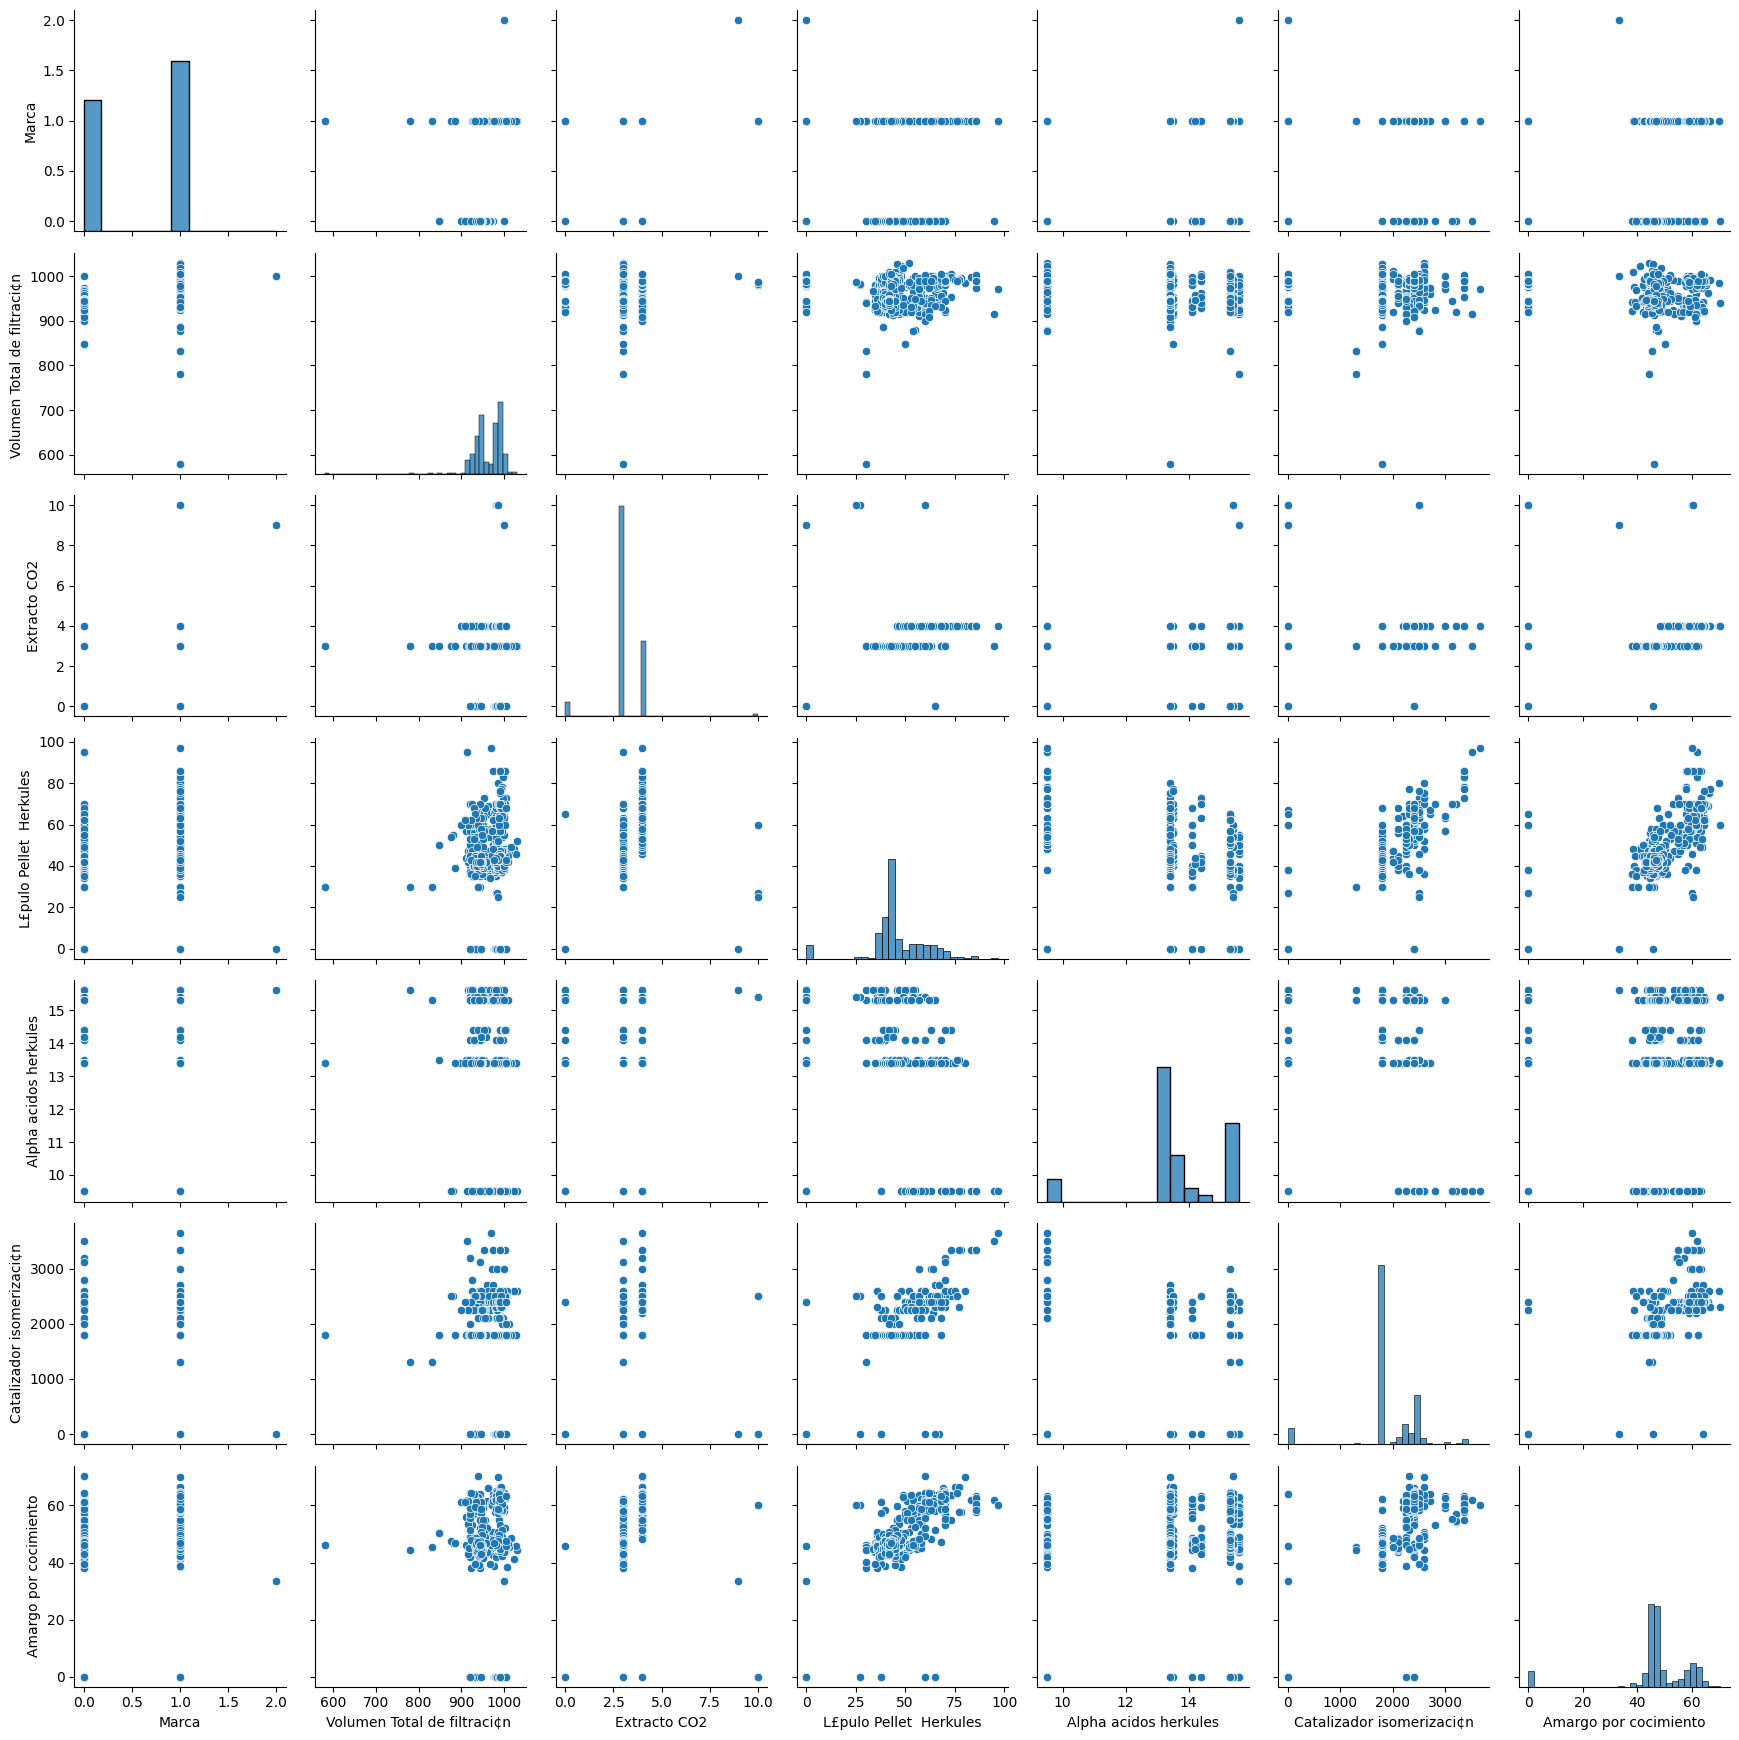

In [ ]:
sns.pairplot(data=df)

plt.tight_layout()
plt.show()

In [ ]:
from utils import analisis_ric
#Se calcularán los límites para retirar los datos atípicos de las variables en cuestión.
analisis_ric(df=df)

columna: Marca limites superior 2.5 e inferior -1.5
columna: Volumen Total de filtraci¢n  limites superior 1062.0 e inferior 870.0
columna: Extracto CO2 limites superior 5.5 e inferior 1.5
columna: L£pulo Pellet  Herkules limites superior 77.5 e inferior 17.5
columna: Alpha acidos herkules limites superior 18.150000000000002 e inferior 10.55
columna: Catalizador isomerizaci¢n limites superior 3050.0 e inferior 1050.0
columna: Amargo por cocimiento limites superior 69.60374999999999 e inferior 30.973750000000003


In [ ]:
#df = df[(df['Marca'] >= -3) & (df['Marca'] <= 5)]
df = df[(df['Volumen Total de filtraci¢n '] >= 869.375) & (df['Volumen Total de filtraci¢n '] <= 1062.375)]
df = df[(df['Extracto CO2'] >= 3) & (df['Extracto CO2'] <= 4)]
df = df[(df['L£pulo Pellet  Herkules'] >= 32.5) & (df['L£pulo Pellet  Herkules'] <= 52.5)]
df = df[(df['Alpha acidos herkules'] >= 10.55) & (df['Alpha acidos herkules'] <= 18.15)]
df = df[(df['Catalizador isomerizaci¢n'] >= 1800) & (df['Catalizador isomerizaci¢n'] <= 3000)]
df = df[(df['Amargo por cocimiento'] >= 41.949) & (df['Amargo por cocimiento'] <= 51.07)]

In [ ]:
df.shape

(379, 7)

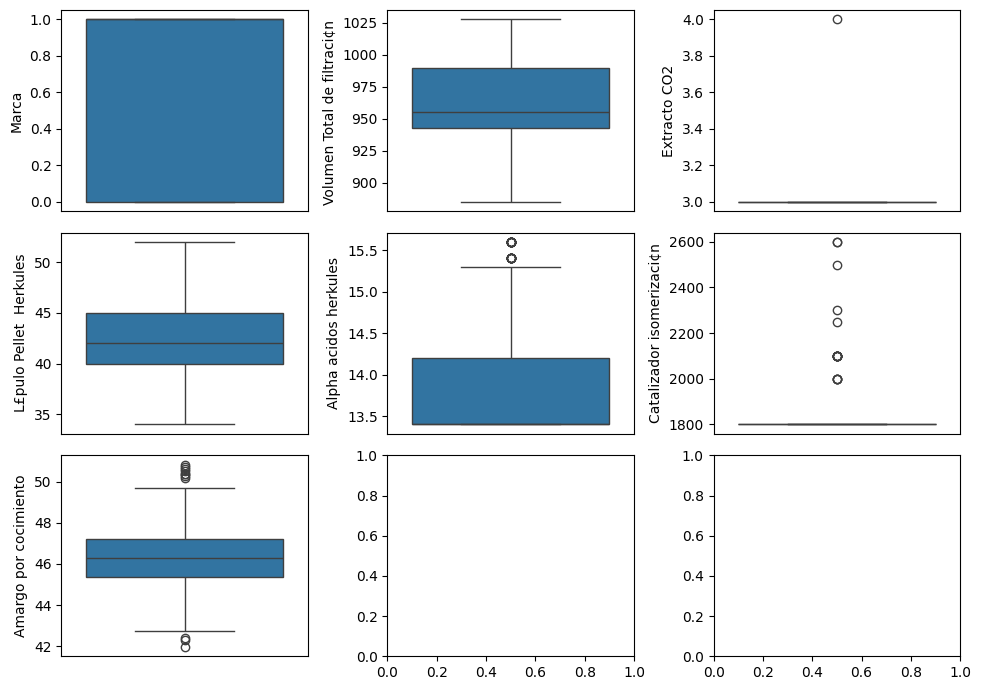

In [ ]:
from utils import analisis_boxplot
analisis_boxplot(df,'Amargo por cocimiento')
#Se cuenta con los datos sin atípicos no deseados.

In [ ]:
#Saco columna marca porque no me interesa, solo es std
df.drop(columns=['Marca'], inplace=True)
df.drop(columns=['Volumen Total de filtraci¢n '], inplace=True)

In [ ]:
#Ahora debo dividir los datos
from sklearn.model_selection import train_test_split
#Aquí saco la columna que voy a predecir
X = df.drop(['Amargo por cocimiento'], axis=1)
#Aquí digo cuál es la columna que voy a predecir
Y = df['Amargo por cocimiento']
#Aquí hago el split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,Extracto CO2,L£pulo Pellet Herkules,Alpha acidos herkules,Catalizador isomerizaci¢n
1917,3.0,42.0,15.3,1800.0
1160,3.0,37.0,15.3,1800.0
2204,3.0,45.0,13.4,1800.0
2187,3.0,47.0,13.4,1800.0
2267,3.0,49.0,13.4,1800.0


In [ ]:
#from sklearn.preprocessing import StandardScaler #Std para regresion lineal
#Se hace el escalado después de dividir los datos porque tengo menos filas que columnas y es matemáticamente mejor en este orden

#Scaler = StandardScaler()
#Scaler.fit(X_train,Y_train)

#X_train_scaled = Scaler.transform(X_train)
#X_test_scaled = Scaler.transform(X_test)

#X_train_esc = pd.DataFrame(X_train_scaled, index=X_train.index,columns = X_train.columns)
#X_test_esc = pd.DataFrame(X_test_scaled, index=X_test.index,columns = X_test.columns)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_rl = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_rl.fit(X_train,Y_train)
#model_lasso.fit(X_train_esc,Y_train)
#model_ridge.fit(X_train_esc,Y_train)

Ridge()

In [ ]:
Y_pred_rl = model_rl.predict(X_test)
#Y_pred_lasso = model_lasso.predict(X_test_esc)
#Y_pred_ridge = model_ridge.predict(X_test_esc)
Y_pred_rl

array([46.40706052, 46.641827  , 45.41127604, 46.25416228, 46.17229404,
       47.32639766, 45.880809  , 47.251309  , 45.880809  , 46.72369524,
       45.880809  , 47.28940788, 46.40706052, 46.25416228, 45.880809  ,
       44.94174308, 45.41127604, 45.48525206, 46.11557548, 45.48525206,
       45.880809  , 46.95846172, 47.15229408, 45.880809  , 45.41127604,
       46.11557548, 45.64604252, 45.880809  , 46.35034196, 46.31088085,
       46.17229404, 46.95846172, 45.17650956, 45.64604252, 45.41127604,
       45.880809  , 46.11557548, 45.880809  , 45.48525206, 46.07611437,
       48.2284738 , 45.64604252, 45.64604252, 46.47450655, 46.35034196,
       45.10400655, 46.35034196, 45.4679946 , 46.58510844, 45.4679946 ,
       45.60658141, 45.880809  , 47.28940788, 46.641827  , 46.58510844,
       47.15229408, 45.64604252, 45.880809  , 46.47450655, 49.06698418,
       46.641827  , 45.7436952 , 46.58510844, 46.58510844, 46.11557548,
       46.79447566, 46.641827  , 46.58510844, 46.58510844, 46.72

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

print(f'el error de la regresión lineal es {mean_squared_error(Y_test,Y_pred_rl)}')
print(f'el R2 de la regresión lineal es {r2_score(Y_test,Y_pred_rl)}')
print(f'el error promedio de la regresión lineal es {root_mean_squared_error(Y_test,Y_pred_rl)}')

#print(f'el error de la regresión lasso es {mean_squared_error(Y_test,Y_pred_lasso)}')
#print(f'el R2 de lasso es {r2_score(Y_test,Y_pred_lasso)}')
#print(f'el error promedio de lasso es {root_mean_squared_error(Y_test,Y_pred_lasso)}')

#print(f'el error de la regresión ridge es {mean_squared_error(Y_test,Y_pred_ridge)}')
#print(f'el R2 de ridge es {r2_score(Y_test,Y_pred_ridge)}')
#print(f'el error promedio de ridge es {root_mean_squared_error(Y_test,Y_pred_ridge)}')

el error de la regresión lineal es 1.4024071132084057
el R2 de la regresión lineal es 0.3431024328748218
el error promedio de la regresión lineal es 1.184232710749203
el error de la regresión lasso es 2.16406489857949
el R2 de lasso es -0.0136635457628409
el error promedio de lasso es 1.4710761022392724
el error de la regresión ridge es 1.4047935436963044
el R2 de ridge es 0.34198461168948313
el error promedio de ridge es 1.1852398675779956


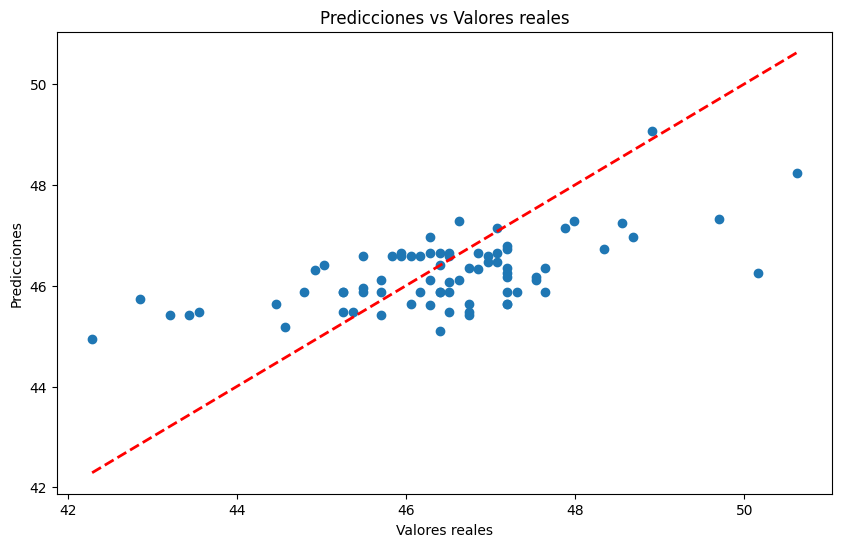

In [ ]:
import matplotlib.pyplot as plt


# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_rl)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

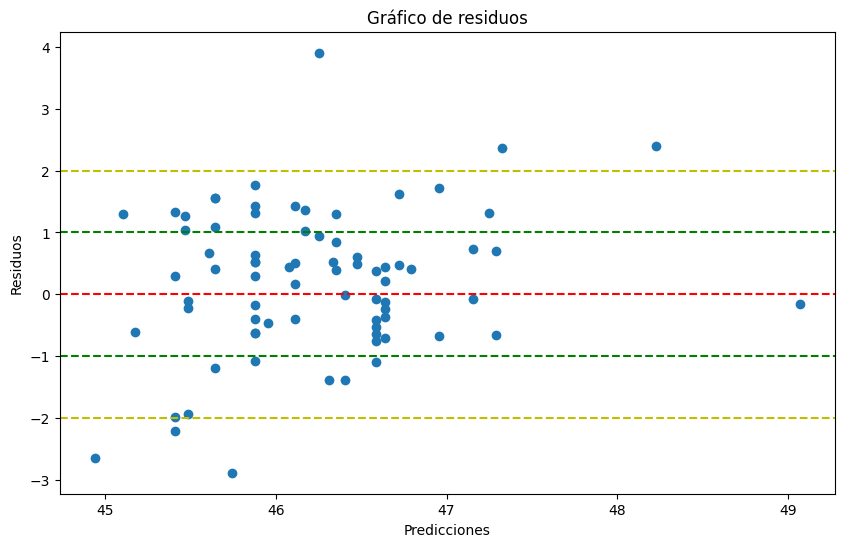

In [ ]:
residuos = Y_test - Y_pred_rl

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_rl, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='y', linestyle='--')  # Línea en y=2
plt.axhline(y=-2, color='y', linestyle='--') # Línea en y=2
plt.axhline(y=1, color='g', linestyle='--')  # Línea en y=2
plt.axhline(y=-1, color='g', linestyle='--') # Línea en y=2
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.show()


In [ ]:
from pickle import dump

dump(model_rl,open('../models/Lineal_Regressor_Bitterness.sav','wb'))

In [ ]:
# Guardar el modelo y las predicciones originales
from pickle import dump
import numpy as np

# Guardar predicciones originales para comparación
y_pred_original = model_rl.predict(X_test)
np.save('../models/y_pred_original.npy', y_pred_original)

# Guardar el modelo
dump(model_rl, open('../models/Lineal_Regressor_Bitterness.sav', 'wb'))

# Verificar carga y predicciones
from pickle import load
model_loaded = load(open('../models/Lineal_Regressor_Bitterness.sav', 'rb'))
y_pred_new = model_loaded.predict(X_test)

# Comparar predicciones
print("¿Predicciones iguales?:", np.allclose(y_pred_original, y_pred_new))
print("\nDiferencia máxima:", np.max(np.abs(y_pred_original - y_pred_new)))

¿Predicciones iguales?: True

Diferencia máxima: 0.0
